# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('train_house.csv')
print(house.isnull().mean(axis=0).sort_values(ascending=False)) #mencari presentase data missing setiap kolom

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64


In [3]:
# Drop variabel NaN
NaN_percentage= house.isnull().mean()
deleted_column = NaN_percentage[NaN_percentage>0.4].index #memfilter baris-baris yang memiliki data kosong lebih dari 40% dari semua kolomnya
house = house.drop(columns=deleted_column, inplace=False) #menghapus baris yang memiliki data kosong lebih dari 40% dari semua kolomnya
house.isnull().mean().sort_values(ascending=False) #melihat presentase missing value setelah di drop 

LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
                  ...   
BsmtUnfSF       0.000000
TotalBsmtSF     0.000000
MSSubClass      0.000000
HeatingQC       0.000000
SalePrice       0.000000
Length: 75, dtype: float64

In [4]:
# Memisahkan data menjadi numerikal & kategorikal
house.dtypes
numerical = house.select_dtypes(include=['int64', 'float64']).columns
categorical = house.select_dtypes('object').columns
house_numerical = house.filter(items=numerical)
house_kategorical = house.filter(items=categorical)

# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

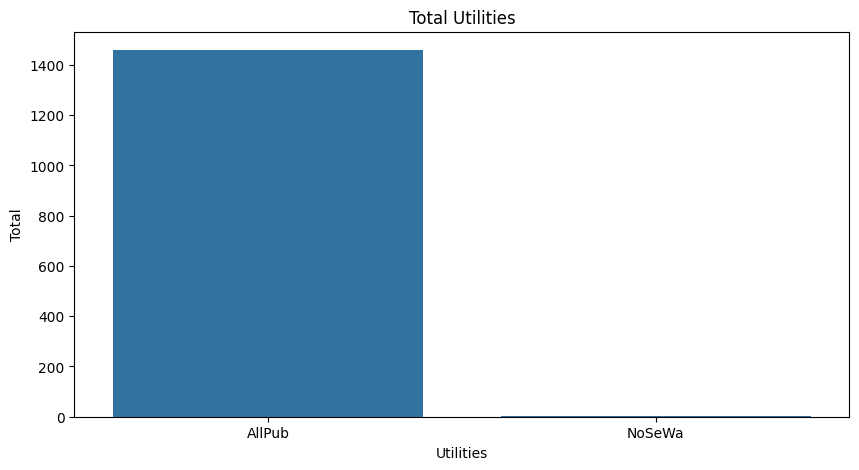

In [16]:
### Tulis kode Anda di sini
utilities= house_kategorical.groupby('Utilities').size().reset_index(name='Total')
plt.figure(figsize=(10, 5))
sns.barplot(data=utilities,x='Utilities',y='Total')
plt.title('Total Utilities')


### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

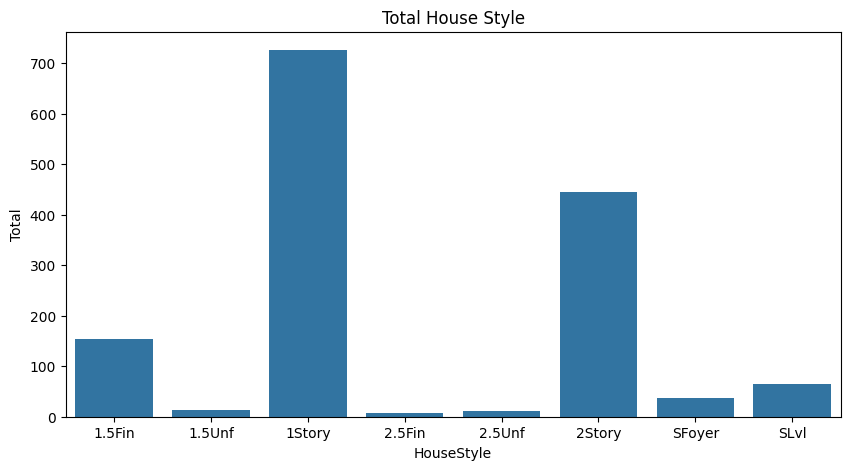

In [17]:
### Tulis kode Anda di sini
houseStyle = house_kategorical.groupby('HouseStyle').size().reset_index(name='Total')
plt.figure(figsize=(10, 5))
sns.barplot(data=houseStyle, x= 'HouseStyle',y='Total')
plt.title('Total House Style')


### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

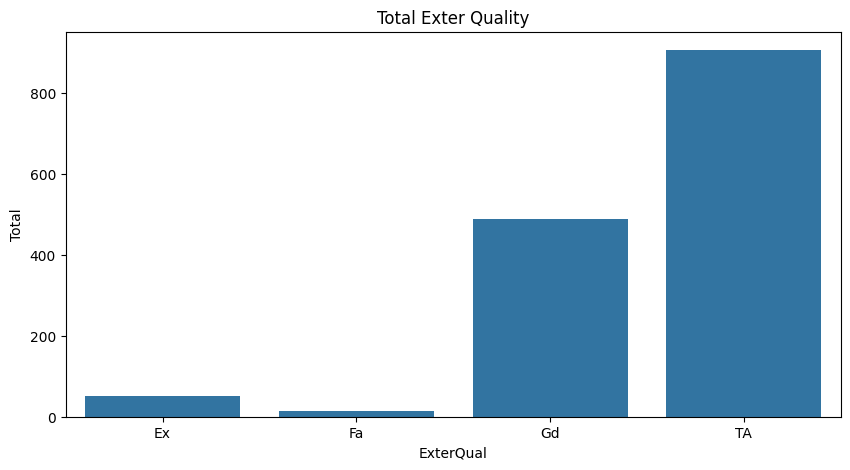

In [18]:
### Tulis kode Anda di sini
ExterQual= house_kategorical.groupby('ExterQual').size().reset_index(name='Total')
plt.figure(figsize=(10, 5))
sns.barplot(data= ExterQual,x='ExterQual',y='Total')
plt.title('Total Exter Quality')


#### **Analisis tentang variabel kategorikal**

* Dari grafik yang muncul, diketahui sebagian besar didominasi bangunan 1 lantai dengan kualitas yang cukup bagus dengan sebagian besar sudah memiliki fasilitas yang lengkap

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

In [8]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

print(f"Mean = {round(np.mean(house_numerical['SalePrice']))}")
print(f"Median = {round(np.median(house_numerical['SalePrice']))}")
print(f"Standard Deviation = {round(np.std(house_numerical['SalePrice']))}")

Mean = 180921
Median = 163000
Standard Deviation = 79415


#### **Analisis tentang variabel `SalePrice`**

*Rata-rata (mean) lebih besar daripada median. Ini biasanya menunjukkan bahwa distribusi data mungkin memiliki skewness (kemiringan) positif, artinya ada beberapa nilai yang sangat besar yang menarik rata-rata ke arah yang lebih tinggi.

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

In [9]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
print(f"Mean = {round(np.mean(house_numerical['GrLivArea']))}")
print(f"Median = {round(np.median(house_numerical['GrLivArea']))}")
print(f"Standard Deviation = {round(np.std(house_numerical['GrLivArea']))}")

Mean = 1515
Median = 1464
Standard Deviation = 525


#### **Analisis tentang variabel `GrlivArea`**

* Karena mean lebih besar dari median, distribusi data kemungkinan besar skewed ke kanan. Ini berarti bahwa sebagian besar data berada di bawah mean, dengan beberapa nilai yang cukup besar di sisi kanan (lebih besar dari mean).

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

In [10]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
print(f"Mean = {round(np.mean(house_numerical['GarageArea']))}")
print(f"Median = {round(np.median(house_numerical['GarageArea']))}")
print(f"Standard Deviation = {round(np.std(house_numerical['GarageArea']))}")

Mean = 473
Median = 480
Standard Deviation = 214


#### **Analisis tentang variabel `GarageArea`**

* Karena median lebih besar dari mean (meskipun sedikit), distribusi data kemungkinan besar memiliki kemiringan negatif yang lemah. Ini berarti sebagian besar data berada di atas mean, dengan beberapa nilai yang cukup rendah di sisi kiri (lebih kecil dari mean).ini*]

## Pemrosesan Data Variabel Numerikal

In [11]:
# Transformasi log-10 SalePrice
house_numerical['SalePrice_log10']= np.log10(house_numerical['SalePrice'])
### Tulis kode Anda di sini
print(f"Mean = {round(np.mean(house_numerical['SalePrice_log10']),2)}")
print(f"Median = {round(np.median(house_numerical['SalePrice_log10']),2)}")
print(f"Standard Deviation = {round(np.std(house_numerical['SalePrice_log10']),2)}")

Mean = 5.22
Median = 5.21
Standard Deviation = 0.17


In [12]:
# Transformasi log-10 GrLivArea

### Tulis kode Anda di sini
house_numerical['GrLivArea_log10']= np.log10(house_numerical['GrLivArea'])
print(f"Mean = {round(np.mean(house_numerical['GrLivArea_log10']),2)}")
print(f"Median = {round(np.median(house_numerical['GrLivArea_log10']),2)}")
print(f"Standard Deviation = {round(np.std(house_numerical['GrLivArea_log10']),2)}")

Mean = 3.16
Median = 3.17
Standard Deviation = 0.14


In [13]:
# Menghilangkan nilai nol pada GarageArea

### Tulis kode Anda di sini
house_numerical['GarageArea']=house_numerical['GarageArea'].replace(0,1) #--> avoid inf 
house_numerical['GarageArea_log10']= np.log10(house_numerical['GarageArea'])
print(f"Mean = {round(np.mean(house_numerical['GarageArea_log10']),2)}")
print(f"Median = {round(np.median(house_numerical['GarageArea_log10']),2)}")
print(f"Standard Deviation = {round(np.std(house_numerical['GarageArea_log10']),2)}")

Mean = 2.52
Median = 2.68
Standard Deviation = 0.63


#### **Penjelasan dan analisis tentang pemrosesan data**

* Dengan adanya normalisasi dengan log10, maka data lebih mudah untuk dimengerti dan dipahami karena lebih relevan (data menjadi lebih kecil tanpa mengubah isi data (kedudukan mean , median dan std nya)

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

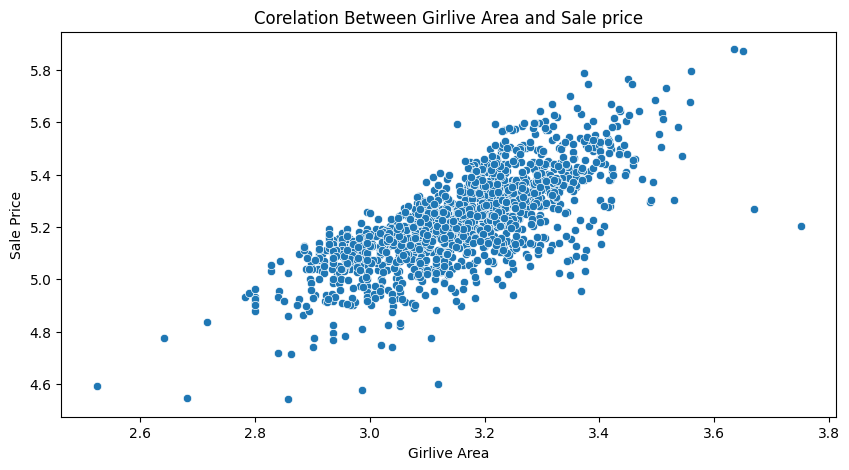

In [19]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=house_numerical,x='GrLivArea_log10',y='SalePrice_log10')
plt.title("Corelation Between Girlive Area and Sale price")
plt.xlabel('Girlive Area')
plt.ylabel('Sale Price')
plt.savefig("4.jpg")

# `GarageArea` dengan `SalePrice`

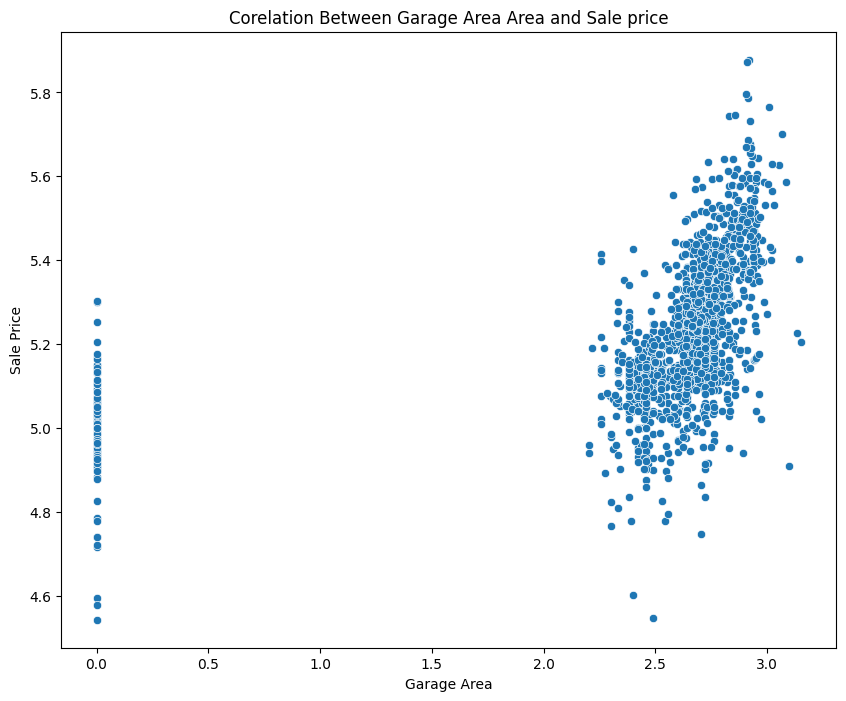

In [20]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data=house_numerical,x='GarageArea_log10',y='SalePrice_log10') 
plt.title("Corelation Between Garage Area Area and Sale price")
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.savefig("5.jpg")

#### **Hipotesis tentang hubungan antar-variabel**

* Dari grafik scater antara grliveare dengan sale price terlihat bahwa semakin luas girlive suatu rumah maka harga jual nya juga akan cenderung semakin tinggi dan sebaliknya
* Dari grafik scater antara garagae area dengan sale price terlihat bahwa tanpa garasi pun harga jual bisa saja memiliki harga yang tinggi, namun untuk rumah yang memiliki garasi, semakin luas garasinya maka akan cenderung semakin mahal.